# Problem statement 
**Titanic - Machine Learning from Disaster**
The goal is to predict whether a passenger survived or not based on features such as age, sex, ticket class, fare, cabin, etc.

The dataset typically includes the following columns:

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# 1. Importing the Dependencies

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Data collection and Processing

In [5]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv(r'C:\Users\nikit\OneDrive\Desktop\Titanic ML\train.csv')

In [6]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# number of rows and Columns
titanic_data.shape

(891, 12)

In [8]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 3. Handling the missing values

In [10]:
# drop the "Cabin" column from the dataframe as it is irrelevent colum 
titanic_data = titanic_data.drop(columns='Cabin', axis=1) # Axis =1 used to drop coloumns and axis =0 used to drop rows

In [11]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True) 

In [12]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [13]:
print(titanic_data['Embarked'].mode()[0])

S


In [14]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True) 

In [15]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 4. Data Analysis

In [16]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data visualization

In [18]:
# Set Seaborn's default style
sns.set()


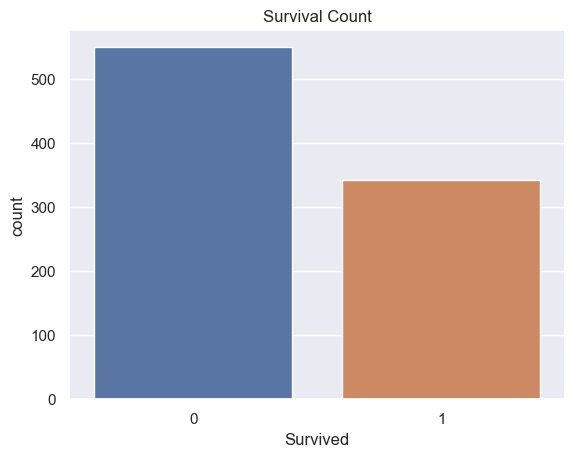

In [20]:
# Making a count plot for the "Survived" column
sns.set(style="darkgrid")  # Set the style of the plots
sns.countplot(x='Survived', data=titanic_data)  # Use 'x' instead of a string for the column
plt.title('Survival Count')
plt.show()  # Display the plot

In [21]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

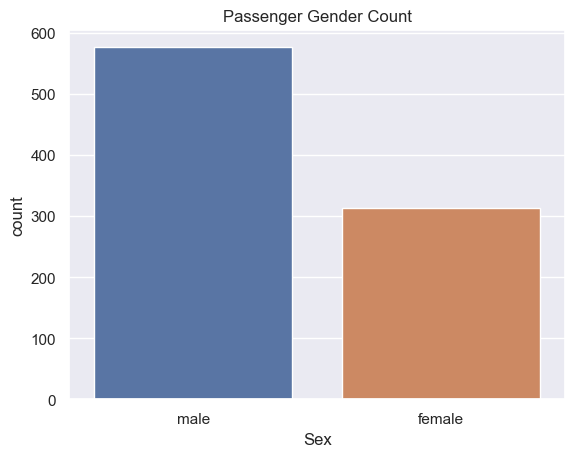

In [24]:
# Making a count plot for the "Sex" column
sns.set(style="darkgrid")  # Set the style of the plots
sns.countplot(x='Sex', data=titanic_data)  # Use 'x' instead of a string for the column
plt.title('Passenger Gender Count')
plt.show()  # Display the plot




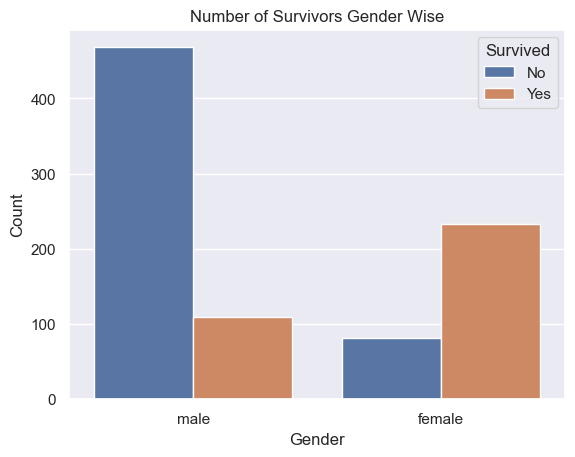

In [27]:
# Create a count plot for the number of survivors based on gender
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

# Set plot title and labels
plt.title('Number of Survivors Gender Wise')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.legend(title='Survived', labels=['No', 'Yes'])  # Add legend with labels
plt.show()

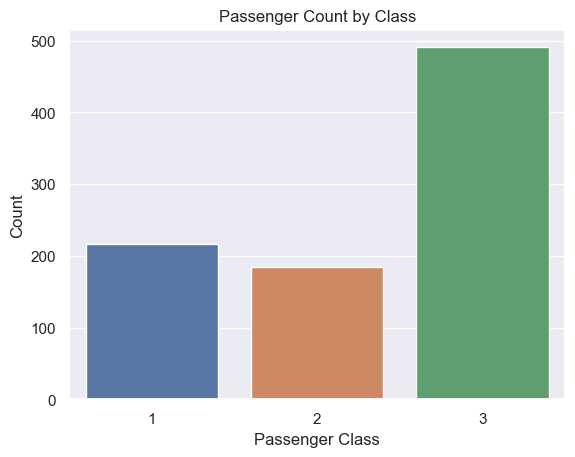

In [28]:
# Create a count plot for the number of passengers in each class
sns.countplot(x='Pclass', data=titanic_data)

# Set plot title and labels
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# Display the plot
plt.show()


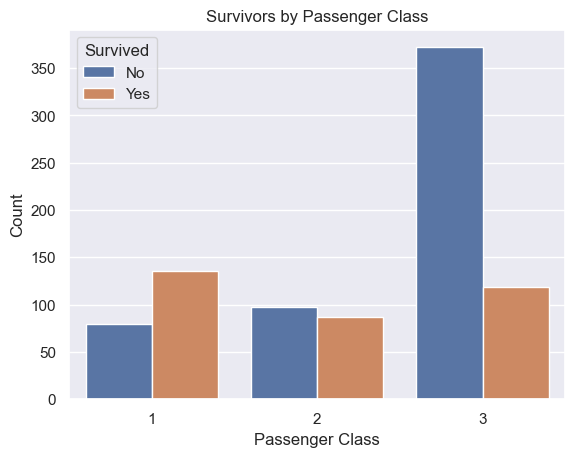

In [31]:
# Create a count plot for the number of survivors based on passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

# Set plot title and labels
plt.title('Survivors by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# Add legend
plt.legend(title='Survived', labels=['No', 'Yes'])

# Display the plot
plt.show()





# Encoding the categorical columns 

In [32]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [33]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [35]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [36]:
# Seperating features and targets 


In [37]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [38]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [39]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [40]:
# Spliting data into training data and test data ''

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


# Model training 
Logistic regression 

In [43]:
model = LogisticRegression()

In [44]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

C:\Users\nikit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation
Accuracy score

In [46]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [47]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [48]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [49]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [50]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [51]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329




### Conclusion of Titanic Dataset Analysis:

In this analysis of the Titanic dataset, we aimed to predict passenger survival based on various features such as age, sex, ticket class, fare, and embarkation port. Here are some key findings and insights from the analysis:

1. **Data Preprocessing:** We started by loading the dataset and performing initial data exploration. We identified missing values in the "Age" and "Embarked" columns and handled them using mean and mode imputation, respectively. The "Cabin" column, with a high number of missing values, was dropped due to its irrelevance.

2. **Data Visualization:** We used various visualizations to gain insights into the dataset. Count plots were created to show the distribution of survival, gender, and passenger class. These plots helped us understand the proportions of survivors based on different categories.

3. **Feature Encoding:** Categorical features like "Sex" and "Embarked" were encoded into numerical values to make them compatible with machine learning algorithms.

4. **Model Training and Evaluation:** We trained a Logistic Regression model using the encoded features and the "Survived" target variable. The model was trained on the training data and evaluated on both training and test data using accuracy as the evaluation metric.

5. **Model Performance:** The Logistic Regression model achieved an accuracy of around 80% on the training data and 78% on the test data. This suggests that the model is able to generalize reasonably well to new, unseen data.

### Why Use Logistic Regression:

**Logistic Regression** is a statistical method used for binary classification tasks, where the target variable has two possible outcomes. In this analysis, we used Logistic Regression for predicting whether a passenger survived (1) or not (0) based on the given features. Here are some reasons why Logistic Regression is a suitable choice for this dataset:

1. **Binary Classification:** Since the Titanic dataset is focused on predicting survival (yes/no), it's a binary classification problem. Logistic Regression is well-suited for such problems, as it outputs probabilities that can be interpreted as the likelihood of belonging to a certain class.

2. **Interpretability:** Logistic Regression provides interpretable results. The coefficients associated with each feature can be interpreted as the impact of that feature on the likelihood of survival.

3. **Simple and Efficient:** Logistic Regression is a simple yet effective algorithm. It's computationally efficient, making it a good choice for quick prototyping and initial model evaluation.

4. **Linear Decision Boundary:** Despite its name, Logistic Regression can model non-linear relationships between features and the target variable by transforming the input features. However, it assumes a linear decision boundary by default, which can work well for some datasets.

5. **Baseline Model:** Logistic Regression often serves as a baseline model. It helps establish a benchmark for performance against which more complex algorithms can be compared.

6. **Probability Outputs:** Logistic Regression outputs probabilities of belonging to a particular class. This is useful when you want not just predictions but also a sense of the model's confidence in those predictions.

While Logistic Regression has its strengths, it might not capture complex relationships in the data as effectively as more advanced algorithms like Random Forests or Gradient Boosting. The choice of algorithm depends on the problem's complexity and the dataset characteristics.

In summary, Logistic Regression is a suitable choice for the Titanic dataset due to its simplicity, interpretability, and ability to handle binary classification tasks effectively.